# Análisis de Portafolio (Q4 2023) de Scion Asset Management (Michael Burry)
En este informe, examinamos el portafolio de Scion Asset Management, un fondo de inversión dirigido por el renombrado inversionista Michael Burry. Los datos analizados se obtuvieron del formulario 13F, accesible desde la página oficial de la SEC (U.S. Securities and Exchange Commission): https://www.sec.gov/Archives/edgar/data/1649339/000090514824000751/xslForm13F_X02/informationtable.xml

### Consideraciones:
- Se seleccionaron exclusivamente las acciones comunes identificadas por las siglas "COM" en la columna "Title of Class" del archivo .xml y en la columna "Tipo" del archivo .csv.

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

In [2]:
portfolio = pd.read_csv('scion-13f-q4-2023.csv') # leemos archivo csv con pandas
portfolio.drop(['Unnamed: 8'], inplace=True, axis=1) # eliminar última columna (vacía)
portfolio.sort_values(by=['VALOR (EN DÓLARES) (Q4 2023)'], ascending=False, inplace=True) # order por valor en dólares (q4 2023)
portfolio['CAMBIO'] = pd.to_numeric(portfolio['CAMBIO']) # cambiar tipo de dato de columna "CAMBIO" a float
portfolio.head() # mostrar primeras 5 filas

,COMPAÑÍA,SECTOR,TIPO,VALOR (EN DÓLARES) (Q4 2023),NO. DE ACCIONES (Q4 2023),VALOR (EN DÓLARES) (Q2 2024),NO. DE ACCIONES (Q2 2024),CAMBIO
8,HCA HEALTHCARE INC,Salud,COM,5413600,20000,6133800,20000,0.13
12,ORACLE CORP,Tecnológico,COM,5271500,50000,5860500,50000,0.11
6,CITIGROUP INC,Financiero,COM,5144000,100000,6266000,100000,0.22
7,CVS HEALTH CORP,Salud,COM,5132400,65000,4366700,65000,-0.15
11,NEXSTAR MEDIA GROUP INC,Entretenimiento,COM,5094375,32500,5164900,32500,0.01


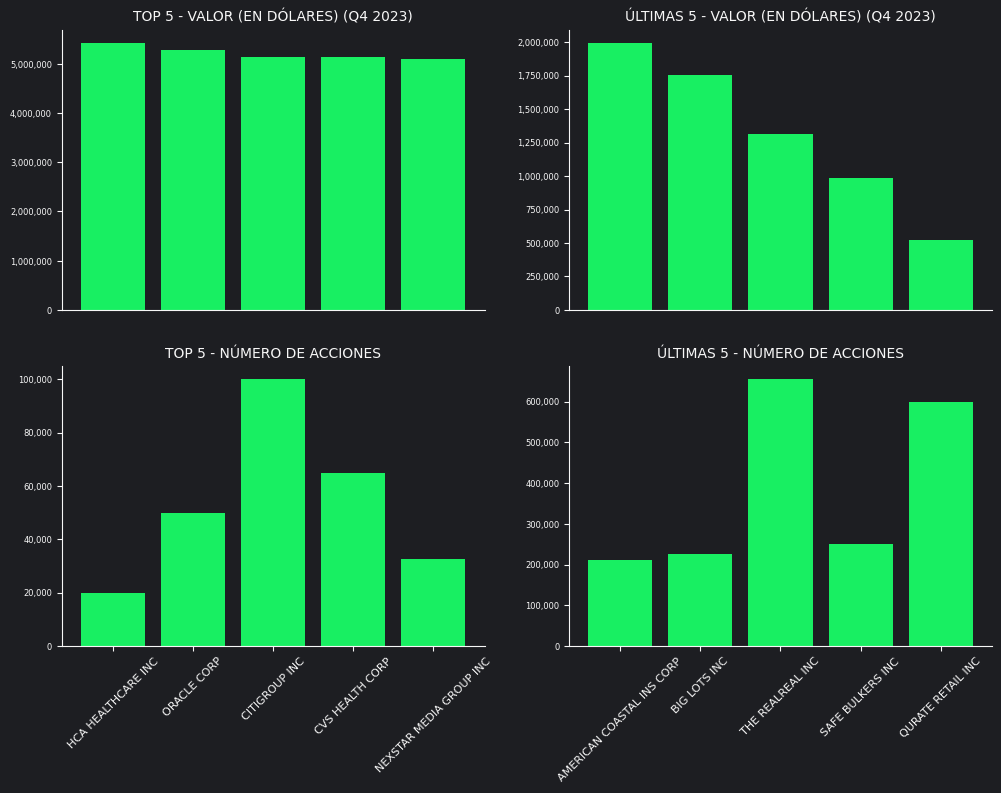

In [3]:
# seleccionamos columnas de compañía, valor en dólares (q4 2023) y no. de acciones (q4 2023)
top_5_companies = portfolio[['COMPAÑÍA', 'VALOR (EN DÓLARES) (Q4 2023)', 'NO. DE ACCIONES (Q4 2023)']].iloc[:5] # top 5 compañías
top_5_companies = top_5_companies.to_numpy() # convertimos df de tres columnas a listas de numpy para poder graficar
bottom_5_companies = portfolio[['COMPAÑÍA', 'VALOR (EN DÓLARES) (Q4 2023)', 'NO. DE ACCIONES (Q4 2023)']].iloc[-5:] # bottom 5 compañías
bottom_5_companies = bottom_5_companies.to_numpy() # convertimos df de tres columnas a listas de numpy para poder graficar

# inicializamos subplots de matplotlib
fig, ((ax_1, ax_2), (ax_3, ax_4)) = plt.subplots(2, 2, figsize=(12, 8))
fig.patch.set_facecolor('#1D1E22') # cambiar color de fondo de figura
axes = [ax_1, ax_2, ax_3, ax_4]

# personalizamos gráficas (colores, tamaño de letra, etc.)
for ax in axes:
    ax.set_facecolor('#1D1E22') # cambiamos color de fondo (a negro)
    ax.spines[['right', 'top']].set_visible(False) # removemos el borde superior y derecho de cada gráfica
    ax.spines['bottom'].set_color('#f7f7f7') # cambiamos color de borde inferior (a blanco)
    ax.spines['left'].set_color('#f7f7f7') # cambiamos color de borde izquierdo (a blanco)
    ax.tick_params(axis='x', colors='#f7f7f7', labelrotation=45, labelsize=8) # cambiamos color de letra en eje x (a blanco), rotamos para que sean legibles y reducimos tamaño de letra
    ax.tick_params(axis='y', colors='#f7f7f7', labelsize=6) # cambiamos color de letra en eje y (a blanco) y reducimos tamaño de letra
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))) # dar formato a números de eje y (dólares)

# escondemos nombre de companía (eje x) en ax_1 y ax_2 (por falta de espacio)
ax_1.set_xticks([])
ax_2.set_xticks([])

# gráficas de barras
ax_1.bar(top_5_companies[:, 0], top_5_companies[:, 1], color='#18EF62') # 5 compañias con mayor valor en el portafolio
ax_2.bar(bottom_5_companies[:, 0], bottom_5_companies[:, 1], color='#18EF62') # 5 compañias con menor valor en el portafolio
ax_3.bar(top_5_companies[:, 0], top_5_companies[:, 2], color='#18EF62') # 5 compañias con mayor no. de acciones en el portafolio
ax_4.bar(bottom_5_companies[:, 0], bottom_5_companies[:, 2], color='#18EF62') # 5 compañias con menor no. de acciones en el portafolio

# títulos
ax_1.title.set_text('TOP 5 - VALOR (EN DÓLARES) (Q4 2023)')
ax_1.title.set_c('#f7f7f7')
ax_1.title.set_fontsize(10)
ax_2.title.set_text('ÚLTIMAS 5 - VALOR (EN DÓLARES) (Q4 2023)')
ax_2.title.set_c('#f7f7f7')
ax_2.title.set_fontsize(10)
ax_3.title.set_text('TOP 5 - NÚMERO DE ACCIONES')
ax_3.title.set_c('#f7f7f7')
ax_3.title.set_fontsize(10)
ax_4.title.set_text('ÚLTIMAS 5 - NÚMERO DE ACCIONES')
ax_4.title.set_c('#f7f7f7')
ax_4.title.set_fontsize(10)

plt.show()

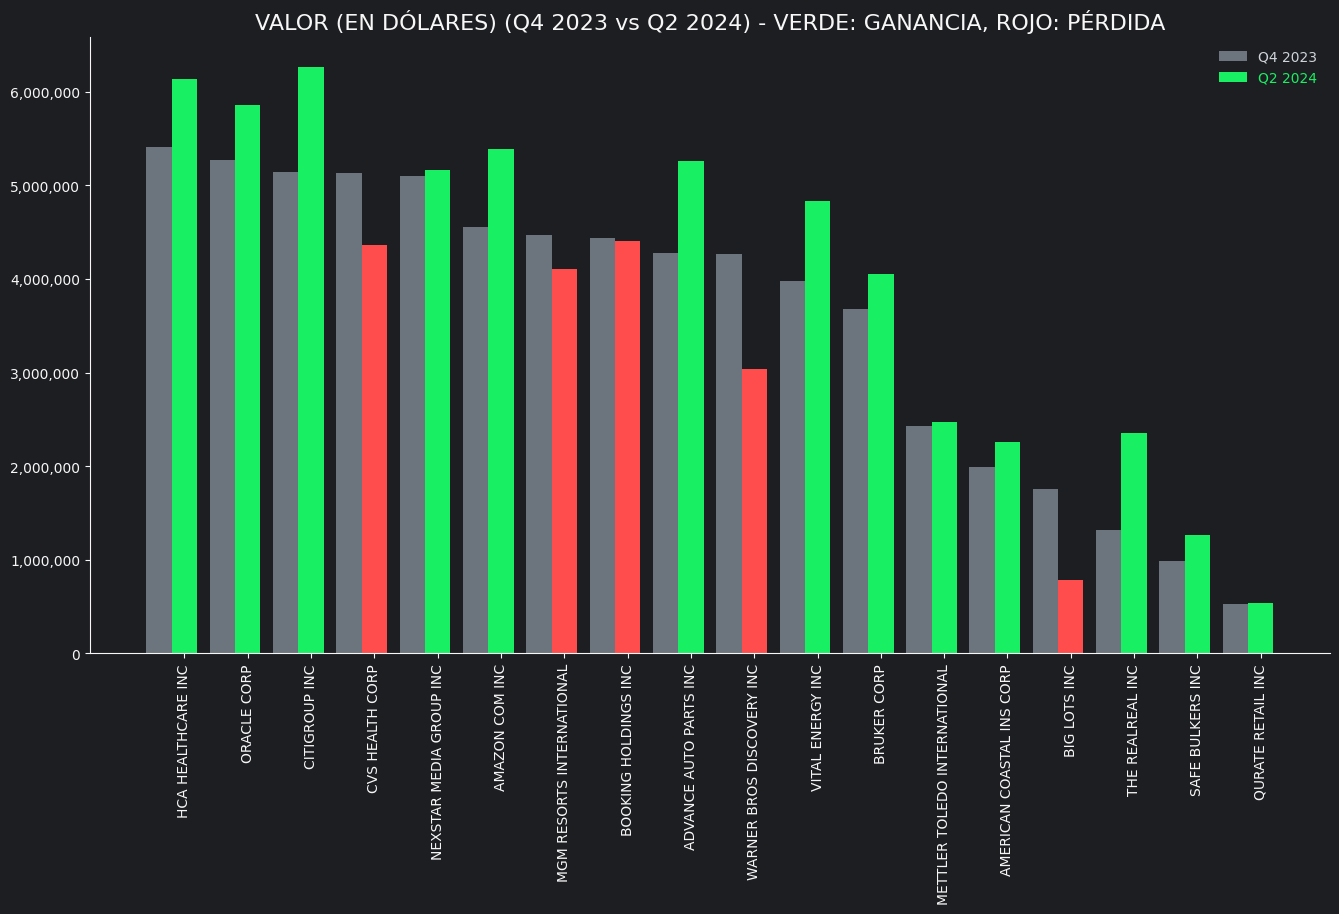

In [4]:
# aumentamos tamaño de gráfica y cambiamos color de fondo
plt.figure(figsize=(16,8), facecolor='#1D1E22')
plt_axes = plt.axes()
plt_axes.set_facecolor('#1D1E22')
plt_axes.spines[['right', 'top']].set_visible(False)
plt_axes.spines['bottom'].set_color('#f7f7f7')
plt_axes.spines['left'].set_color('#f7f7f7')
plt_axes.tick_params(axis='x', colors='#f7f7f7')
plt_axes.tick_params(axis='y', colors='#f7f7f7')

# creamos una nueva columna para guardar el color de la barra
# ganancia --> color verde
# pérdida -->  color rojo
portfolio['COLOR'] = np.where(portfolio['CAMBIO'] > 0, '#18EF62', '#FF4C4C')
bar_colors = portfolio[['COLOR']].to_numpy() # convertimos la col de "COLOR" a un arreglo de numpy
companies = portfolio[['COMPAÑÍA']].to_numpy() # convertimos la col "COMPAÑÍA" a arreglo de numpy para utilizar en xticks
position_2023 = portfolio[['VALOR (EN DÓLARES) (Q4 2023)']].to_numpy() # convertimos la col de "VALOR (EN DÓLARES) (Q4 2023)" a un arreglo de numpy
position_2024 = portfolio[['VALOR (EN DÓLARES) (Q2 2024)']].to_numpy() # convertimos la col de "VALOR (EN DÓLARES) (Q2 2024)" a un arreglo de numpy

X = np.arange(portfolio.shape[0]) # generamos un arreglo de numpy (0 - 17) para graficar las barras agrupadas 
plt.xticks(X, companies[:, 0]) # sustituimos valores de X con los nombres de las compañías
plt.xticks(rotation=90, fontsize=10) # rotamos y reducimos tamaño de xticks (nombres de companías)
plt.yticks(fontsize=10) # reducimos tamaño de yticks (valor en dólares)
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))) # dar formato a números de eje y (dólares)

# gráficas de barras
plt.bar(X-0.4, position_2023[:, 0], width=0.4, color='#6C757D') # gráfica de barras con offset (-0.4)
plt.bar(X, position_2024[:, 0], width=0.4, color=bar_colors[:, 0]) # gráfica de barras SIN offset
plt.legend(["Q4 2023", "Q2 2024"], facecolor='white', framealpha=0, labelcolor=['#CED4DA', '#18EF62']) # mostramos leyenda en esquina superior derecha
plt.title('VALOR (EN DÓLARES) (Q4 2023 vs Q2 2024) - VERDE: GANANCIA, ROJO: PÉRDIDA', color='#f7f7f7', fontsize=16)

plt.show()

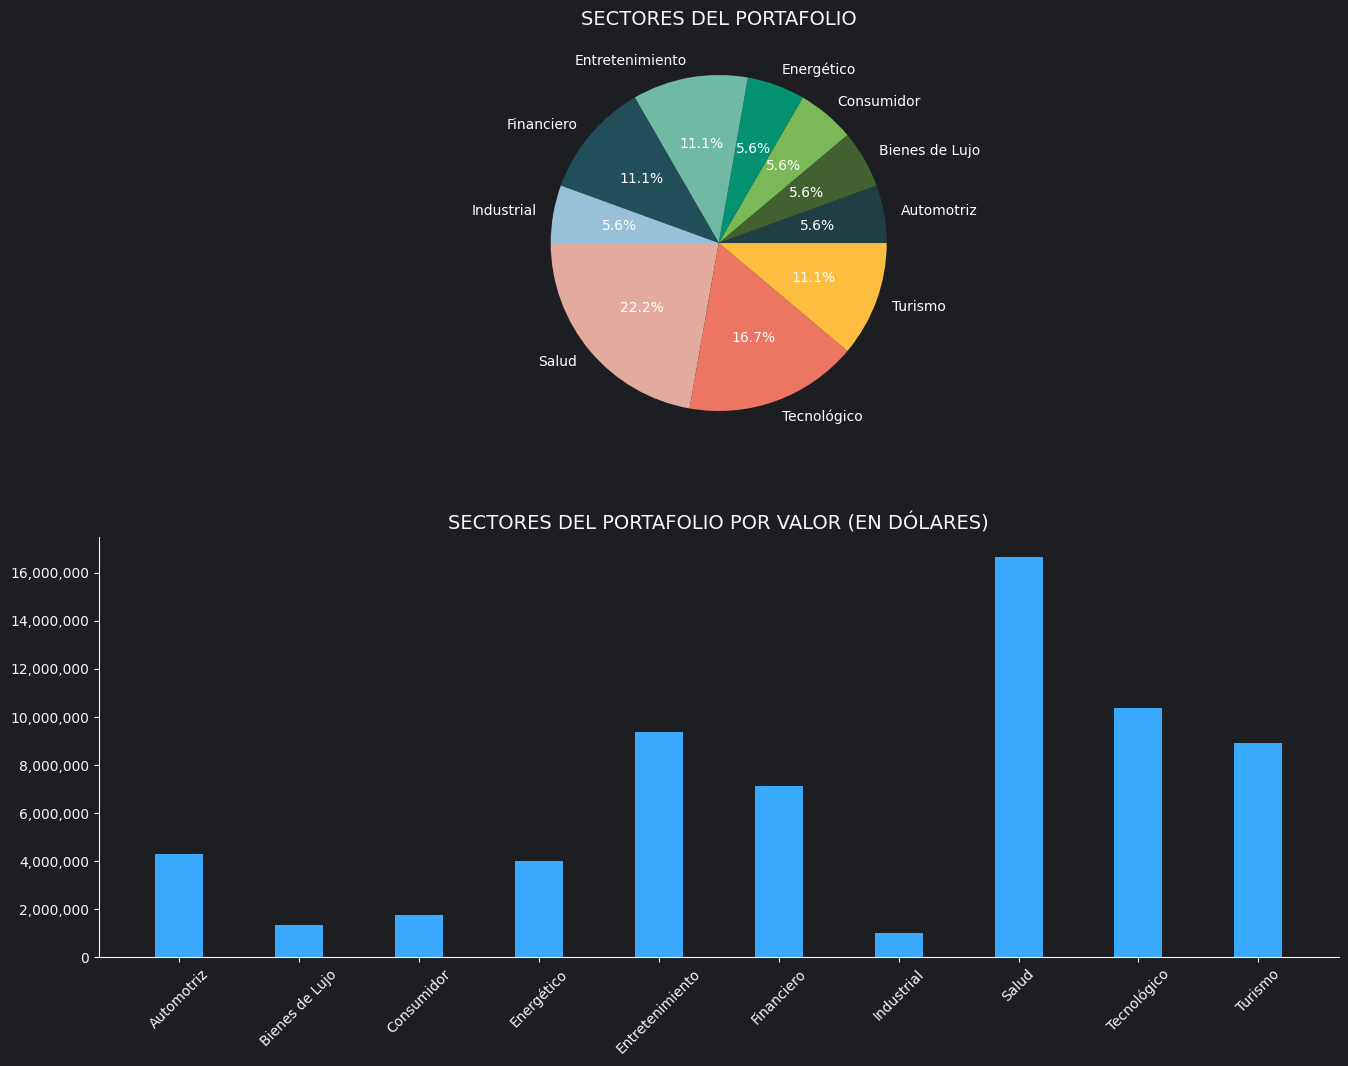

In [11]:
# agrupamos dataframe por sectors y calculas la suma del valor en dólares
value_by_sectors = portfolio.groupby(['SECTOR'])['VALOR (EN DÓLARES) (Q4 2023)'].sum().reset_index()
#print(value_by_sectors)

# calculamos valores únicos y su # de apariciones
sectors = portfolio[['SECTOR']]
unique, counts = np.unique(sectors, return_counts=True)
#print(unique, counts)

# inicializamos subplots de matplotlib
fig, (ax_1, ax_2) = plt.subplots(2, 1, figsize=(16, 12))
fig.patch.set_facecolor('#1D1E22') # cambiamos color de fondo de figura
axes = [ax_1, ax_2]

# personalizamos gráficas (colores, tamaño de letra, etc.)
for ax in axes:
    ax.set_facecolor('#1D1E22') # cambiamos color de fondo (a negro)
    ax.spines[['right', 'top']].set_visible(False) # removemos el borde superior y derecho de cada gráfica
    ax.spines['bottom'].set_color('#f7f7f7') # cambiamos color de borde inferior (a blanco)
    ax.spines['left'].set_color('#f7f7f7') # cambiamos color de borde izquierdo (a blanco)
    ax.tick_params(axis='x', colors='#f7f7f7', labelrotation=45, labelsize=10) # cambiamos color de letra en eje x (a blanco), rotamos para que sean legibles y reducimos tamaño de letra
    ax.tick_params(axis='y', colors='#f7f7f7', labelsize=10) # cambiamos color de letra en eje y (a blanco) y reducimos tamaño de letra
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))) # dar formato a números de eje y (dólares)

# generamos gráfica pastel
ax_1.pie(counts, labels=unique, autopct='%1.1f%%', textprops={'color':"w"}, colors=[
    '#1f3f42', 
    '#426131', 
    '#7ab858', 
    '#059271', 
    '#70b9a5', 
    '#224e5a', 
    '#98c1d9', 
    '#e3ab9d', 
    '#ec7661', 
    '#fdbd40'
])

# generar gráfica de barras (valor por sector)
ax_2.bar(value_by_sectors.iloc[:, 0], value_by_sectors.iloc[:, 1], width=0.4, color='#3AAAFF')

# títulos
ax_1.title.set_text('SECTORES DEL PORTAFOLIO')
ax_1.title.set_c('#f7f7f7')
ax_1.title.set_fontsize(14)
ax_2.title.set_text('SECTORES DEL PORTAFOLIO POR VALOR (EN DÓLARES)')
ax_2.title.set_c('#f7f7f7')
ax_2.title.set_fontsize(14)

plt.show()